In [2]:
import scipy
print(scipy.__version__)

1.12.0


In [3]:
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import mne

In [4]:
metadata_path = Path('../daiv_plus/EEG_dataset_metadata_eeg_format_edited.xlsx')
metadata = pd.read_excel(metadata_path)

In [5]:
# 정상 Format만 filtering
metadata = metadata[metadata['format'] == 0]

* <code>mne.io.read_raw_edf()</code>로 EEG 데이터 가져옴

In [6]:
def get_sample_from_metadata(index: int):
    sample_path = metadata.loc[index, 'eeg_path'][-5:]
    sample_path = f'../daiv_plus/EEG_Dataset/{sample_path}'
    for filename in os.listdir(sample_path):
        sample_path = os.path.join(sample_path, filename)
    return mne.io.read_raw_edf(sample_path, preload=True)

In [7]:
# 샘플 하나로 Visualize
sample = get_sample_from_metadata(0)

Extracting EDF parameters from F:\Doby\daiv_plus\EEG_Dataset\00001\00001.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\user\AppData\Local\Temp\ipykernel_24108\3733871226.py:6: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  return mne.io.read_raw_edf(sample_path, preload=True)


Reading 0 ... 9599  =      0.000 ...    47.995 secs...


# Sample 조사 (1): Channels
* Sample(EEG) 하나를 가져와서 이것저것 탐색해보는 과정
* 읽어온 <code>sample</code>에 대해서 <code>sample.info['ch_names']</code>를 확인해보았다.
* 어떤 채널이 있는지 확인
* * *
<a href="https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw"><code>mne.io.Raw</code> documentation</a>

In [8]:
# Sample 하나로 Visualization
sample.info['ch_names']

['Fp1-AVG',
 'F3-AVG',
 'C3-AVG',
 'P3-AVG',
 'O1-AVG',
 'Fp2-AVG',
 'F4-AVG',
 'C4-AVG',
 'P4-AVG',
 'O2-AVG',
 'F7-AVG',
 'T3-AVG',
 'T5-AVG',
 'F8-AVG',
 'T4-AVG',
 'T6-AVG',
 'FZ-AVG',
 'CZ-AVG',
 'PZ-AVG',
 'EKG',
 'EOGLt-AVG',
 'EOGRt-AVG']

# Sample 조사 (2): Times, sample rate
* <code>sample.times</code>를 통해 9600 길이의 0.005초 간격의 신호로 구성되어있는 것을 알 수 있다.
* 즉, 0.005초가 1초가 되기 위해서는 200배가 필요하므로 해당 Sample의 Sample Rate는 200이다.
* 또한, 1초에 200번 측정한 것이 총 9600개로 구성되어 있으므로 샘플의 총 시간은 48초의 신호로 구성되어 있는 것으로 유추할 수 있었다.
* * *
* 이게 맞는지에 대한 답은 sample을 단순히 출력했을 때, 알 수 있었다.
* sample의 Data -> Sampling frequency: <u>200.00Hz</u>
* Sample의 Data -> Duration: <u>00\:00\:48</u>

In [9]:
for i in range(0, 10):
    print(sample.times[i])

0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045


In [10]:
print(len(sample.times))
print(sample.n_times)

9600
9600


In [11]:
sample

Measurement date,"June 29, 2018 13:12:02 GMT"
Experimenter,Unknown
Participant,No
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


# Sample 조사 (3): Channel Type
* <code>\_\_contains\_\_('string')</code>메서드를 통해 sample이 어떤 유형의 시그널 데이터인지 확인 할 수 있었다.
* 본 샘플은 EEG 신호로 구성되어있음을 확인했다.

In [12]:
print(sample.__contains__('meg'))
print(sample.__contains__('eeg'))
print(sample.__contains__('stim'))

False
True
False


# Sample 조사 (4): 직접적인 시그널 데이터 얻기
* <code>\_\_getitem\_\_</code>메서드를 통해 직접적인 데이터를 얻어낼 수 있지만, mne에서는 단순히 Array Indexing했을 때, 데이터를 얻을 수 있도록 구현하였다.

In [13]:
data, times = sample[:, :]

In [14]:
print(data.shape, times.shape)

(22, 9600) (9600,)


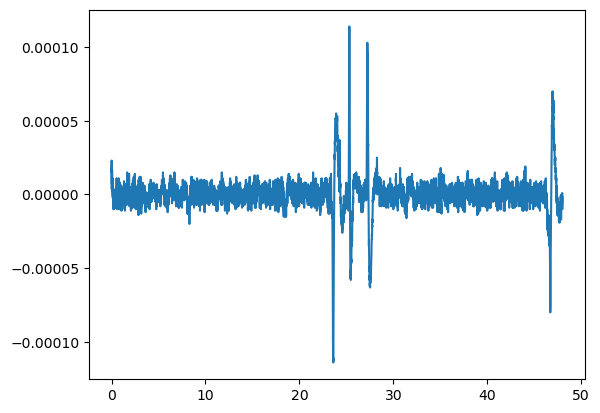

In [15]:
# 하나의 Channel에 대한 시각화
plt.plot(times, data[0])
plt.show()

# <code>EEG Plot</code>
* <code>mne.io.Raw</code> 자체 내의 메서드 plot을 통해 시각화
* EKG, EOG는 사용 안 할 거 같은데..

Using matplotlib as 2D backend.


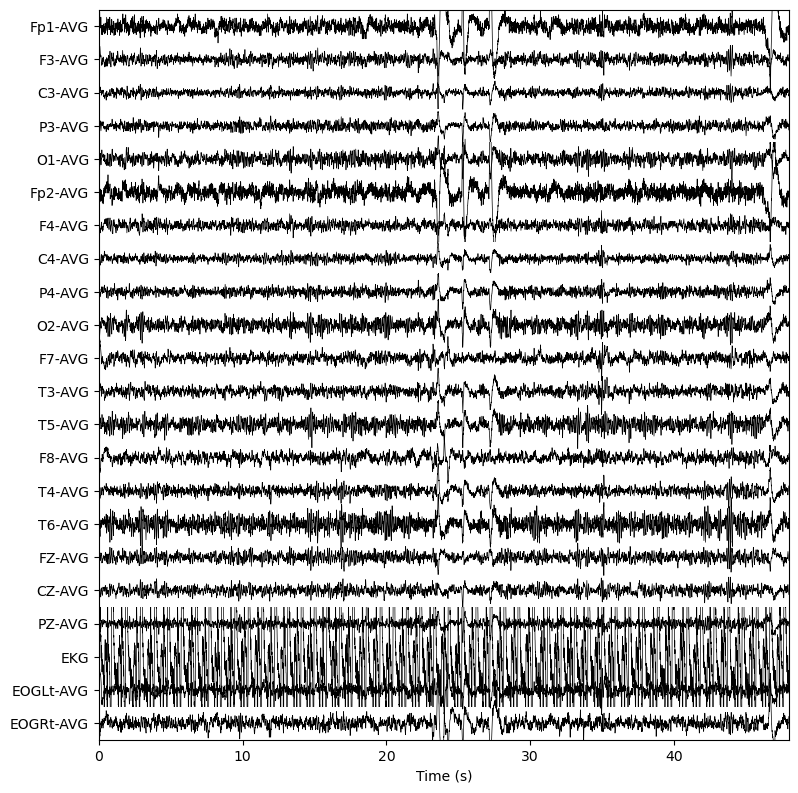

In [16]:
'''
duration: plot시킬 시간 범위(second) -> float
n_channels: plot시킬 channel 수 -> int, len(sample.info['ch_names'])를 통해서 모든 채널 다 plot
show_scrollbars, show_scalebars: 스크롤 없애기 위한 용도의 파라미터

'''
eeg_plot = sample.plot(duration=48, 
            n_channels=len(sample.info['ch_names']), 
            show_scrollbars=False, 
            show_scalebars=False,
           )
eeg_plot.savefig('./Plot Samples/eeg_plot_sample.jpg', dpi=500)
plt.show()

# <code>EEG PSD</code>
* <code>mne.io.Raw</code> 자체 내의 메서드 plot을 통해 시각화

Effective window size : 10.240 (s)


C:\Users\user\AppData\Local\Temp\ipykernel_24108\2313573747.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_psd_plot = eeg_psd.plot()
C:\Users\user\anaconda3\lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


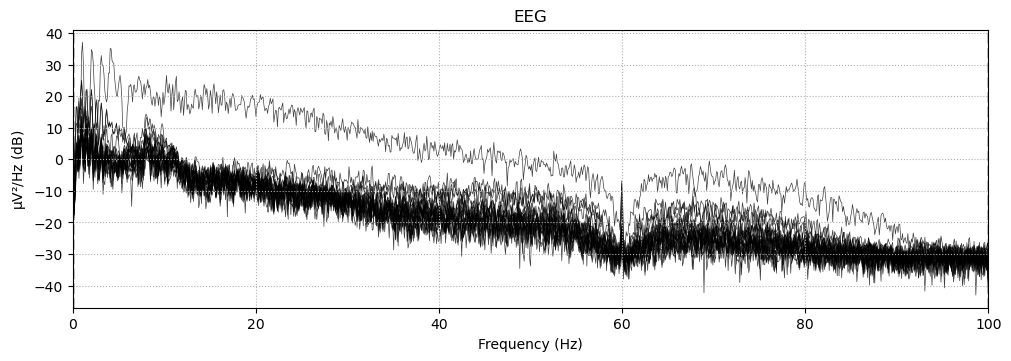

In [17]:
eeg_psd = sample.compute_psd()
eeg_psd_plot = eeg_psd.plot()

eeg_psd_plot.savefig('./Plot Samples/eeg_psd_sample.jpg', dpi=500)
plt.show()

# <code>EEG STFT</code> (Short-Time Fourier-Transform)
* <a href="https://pinkwink.kr/1370">STFT Plot Reference</a>
* <a href="https://docs.scipy.org/doc/scipy/tutorial/signal.html#tutorial-stft">STFT description in scipy</a>
* * *
## <a href="https://github.com/scipy/scipy/blob/v1.12.0/scipy/signal/_short_time_fft.py#L78-L1672"><code>scipy.signal.ShortTimeFFT</code> Open Source</a>
* 1.12.0 버전부터 제공하기 때문에 <code>pip install scipy==1.12.0</code> 필요
## 예시 신호를 만들어서 STFT 핸들링에 대한 이해도 높이기

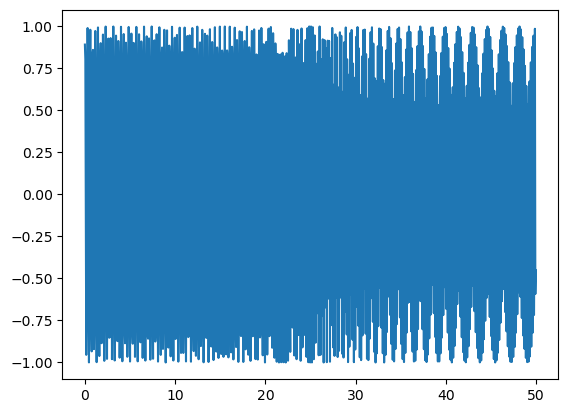

In [18]:
# Examples

# 50초 길이의 신호 데이터
# Sample rate가 20Hz -> Time = 0.05s
T_x = 1 / 20
N = 1000
t_x = np.arange(N) * T_x # 신호 point 별 time index

# 아래 부분은 그냥 x라는 신호를 만드는 예시이니 신경쓰지 않아도 된다.
f_i = 1 * np.arctan((t_x - t_x[N // 2]) / 2) + 5
x = np.sin(2*np.pi*np.cumsum(f_i)*T_x) # signal
plt.plot(t_x, x)
plt.show()

In [19]:
from scipy import signal

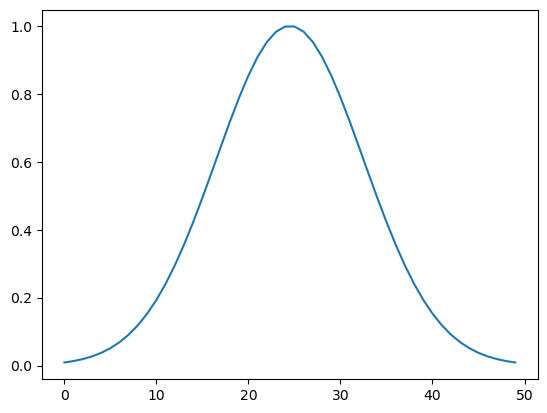

In [20]:
g_std = 8
# 50개의 점으로 표준편차가 8이며, Symmetric한 Gaussian Window 생성
w = signal.windows.gaussian(50, std=g_std, sym=True)
plt.plot(np.arange(50), w)
# print(w.shape) # 50

# 궁금한 점 (1)
# win이면, 구간을 나타내는 길이여야 하는 거 아닌가? 왜 뜬금없이 Gaussian이지?
# 내 추측: 50이라는 길이의 구간에서 모두 같은 푸리에 변환을 하지만,
# 가우시안 분포를 통해서 가중치를 부여하는 거 같다. 비전 분야의 가우시안 필터링과 목적이 비슷한 거 같다.

# 즉, 2.5초 구간을 가지며, 해당 구간에 대해서 푸리에 변환을 하고 각 시간에 대해 가중치를 부여한다.

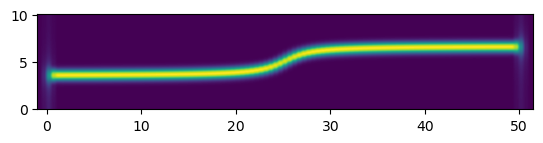

In [21]:
# 궁금한 점 (2): fs의 역할은 뭘까
# 굳이 Sample Rate를 알아야 하는 이유가 있나?
# github 오픈 소스 찾아보니까 딱히 역할은 없는 거 같다.
# 더 면밀하게 정확히하려면 시각화하면서 변화를 줘봐야할 거 같다. 그래도 없을 것으로 추측됨.

# 궁금한 점 (3): mfft
# FFT가 적용되는 구간의 길이이다. default=None이면, win의 length가 들어간다고 한다.
# 하지만, win은 50인데, mfft는 200이라고 한다. 즉, 4배가 되는데 이러한 이유가 있나?
# 이 4배가 Oversampling factor의 역할을 한다고 한다.

# 
STFT = signal.ShortTimeFFT(w, hop=10, fs=1/T_x, mfft=4*w.shape[0]) # Oversampling Factor = 4
Sx = STFT.stft(x)

plt.imshow(abs(Sx), origin='lower', extent=STFT.extent(N))
plt.show()

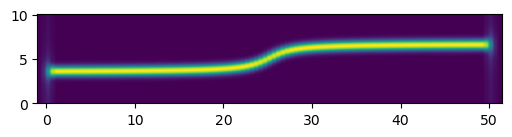

In [22]:
# mfft 값 2배로 주었을 때 -> 큰 차이 없음
plt.figure(figsize=(6, 4))
STFT = signal.ShortTimeFFT(w, hop=10, fs=1/T_x, mfft=8*w.shape[0]) # Oversampling Factor = 8
Sx = STFT.stft(x)

plt.imshow(abs(Sx), origin='lower', extent=STFT.extent(N))

plt.show()

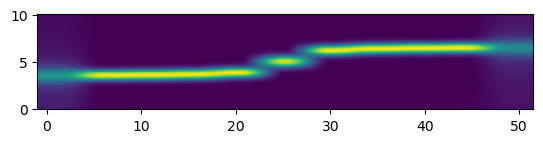

In [23]:
# 신호에 대해 새로운 Window로 STFT를 걸었을 때
w2 = signal.windows.gaussian(100, std=g_std, sym=True)
STFT2 = signal.ShortTimeFFT(w2, hop=100, fs=1/T_x, mfft=100)
Sx2 = STFT2.stft(x)

plt.imshow(abs(Sx2), origin='lower', extent=STFT.extent(N))
plt.show()

# 실제 EEG를 STFT로 걸었을 때
* 바로 아래 첫 셀은 <code>00001.EDF</code>의 1st channel <b><u>Fp1-AVG</u></b>
* 두 번째 셀은 모든 채널을 전부 STFT plot
* 세 번째 셀은 모든 채널을 더한 뒤 하나의 STFT plot

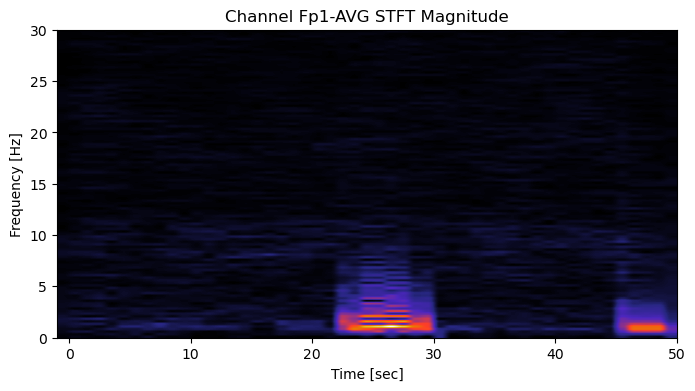

In [24]:
ch_name = sample.info['ch_names'][0]
fs = sample.info['sfreq']
sample_length = data.shape[1]
window_length = int(fs) * 4 # 4초 구간의 Window
hop_length = int(fs) # 1초 구간의 Hop

w = np.ones(window_length) # window length의 numpy array를 생성해준다.
# 굳이 scalar 값이 아닌 이유는 Gaussian 분포처럼 각 시간 별의 주파수에 대한 가중치를 주기 위해서다.
# 위의 예시가 가우시안을 이용한 것

STFT = signal.ShortTimeFFT(w, hop=hop_length, fs=fs)
Sx = STFT.stft(data[0])

plt.figure(figsize=(8, 4))
plt.imshow(abs(Sx), 
           origin='lower', # 일반 평면 좌표계처럼
           extent=STFT.extent(sample_length), # (xmin, xmax, ymin, ymax) 받아오기 
           aspect='auto', # figure size 따라가게 함.
           cmap='CMRmap') # CMRmap
plt.title(f'Channel {ch_name} STFT Magnitude')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

plt.ylim(0, 30) # 0 ~ 30Hz만 나타냄
plt.savefig('./Plot Samples/channel_1_stft.jpg', dpi=500)
plt.show()

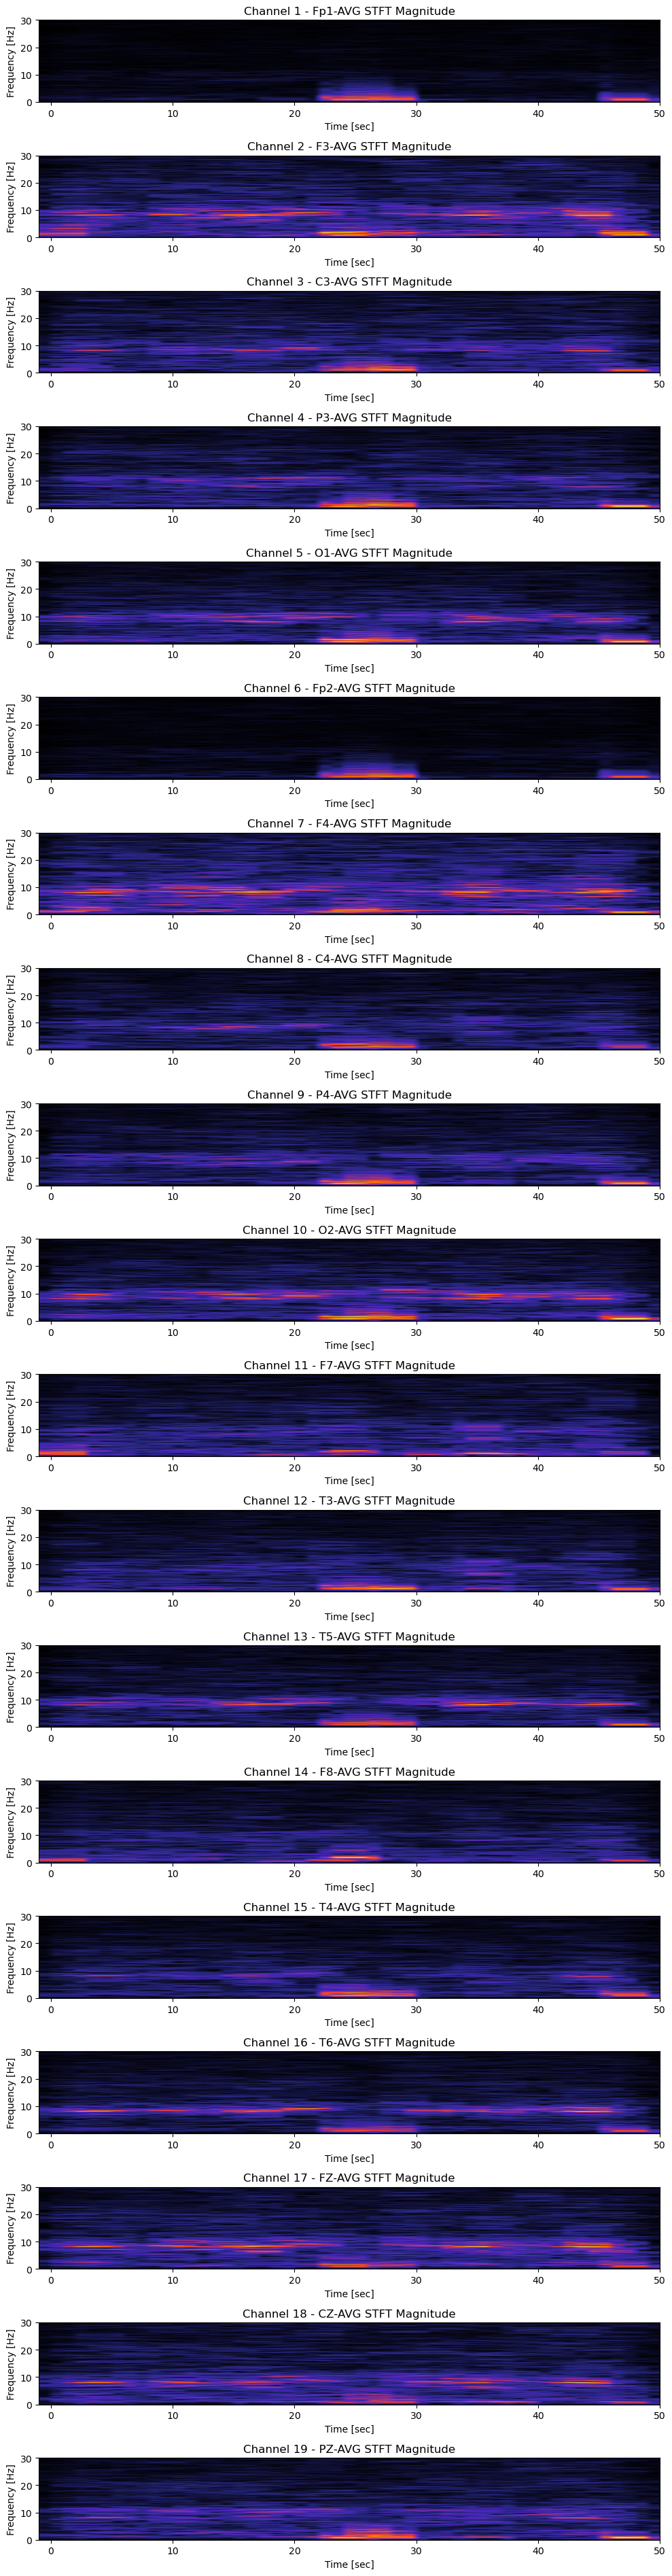

In [25]:
# 제외할 채널 목록
channels_to_drop = ['EKG', 'EOGLt-AVG', 'EOGRt-AVG']

# 제외할 채널 제거
sample.drop_channels(channels_to_drop)

n_channels = sample.info['nchan']
fig, axes = plt.subplots(n_channels, 1, figsize=(10, n_channels*2))

fs = sample.info['sfreq']
sample_length = data.shape[1]

window_length = int(fs) * 4 # 4초 구간의 Window
w = np.ones(window_length)
hop_length = int(fs) # 1초 구간의 Hop

STFT = signal.ShortTimeFFT(w, hop=hop_length, fs=fs, mfft=4*w.shape[0])

for i in range(n_channels):
    channel_data = data[i]

    Sx = STFT.stft(data[i])

    axes[i].imshow(abs(Sx), 
           origin='lower', 
           extent=STFT.extent(sample_length), 
           aspect='auto',
           cmap='CMRmap') # CMRmap
    axes[i].set_title(f'Channel {i+1} - {sample.ch_names[i]} STFT Magnitude')
    axes[i].set_ylabel('Frequency [Hz]')
    axes[i].set_xlabel('Time [sec]')
    axes[i].set_ylim(0, 30)

plt.tight_layout()
plt.savefig('./Plot Samples/channel_all_stft.jpg', dpi=500)
plt.show()

In [26]:
data_all_channels = data.sum(axis=0)
print(data.shape, data_all_channels.shape)

(22, 9600) (9600,)


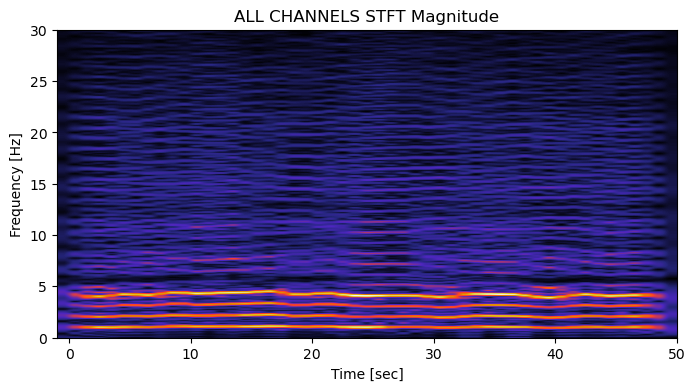

In [27]:
fs = sample.info['sfreq']
sample_length = data_all_channels.shape[0]
window_length = int(fs) * 4 # 4초 구간의 Window
hop_length = int(fs) # 1초 구간의 Hop

w = np.ones(window_length) # window length의 numpy array를 생성해준다.
# 굳이 scalar 값이 아닌 이유는 Gaussian 분포처럼 각 시간 별의 주파수에 대한 가중치를 주기 위해서다.
# 위의 예시가 가우시안을 이용한 것

STFT = signal.ShortTimeFFT(w, hop=hop_length, fs=fs, mfft=4*w.shape[0])
Sx = STFT.stft(data_all_channels)

plt.figure(figsize=(8, 4))
plt.imshow(abs(Sx), 
           origin='lower', # 일반 평면 좌표계처럼
           extent=STFT.extent(sample_length), # (xmin, xmax, ymin, ymax) 받아오기 
           aspect='auto', # figure size 따라가게 함.
           cmap='CMRmap') # CMRmap
plt.title(f'ALL CHANNELS STFT Magnitude')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

plt.ylim(0, 30) # 0 ~ 30Hz만 나타냄
plt.savefig('./Plot Samples/ALL_CHANNELS_PLUS.jpg', dpi=500)
plt.show()

Already Dropped


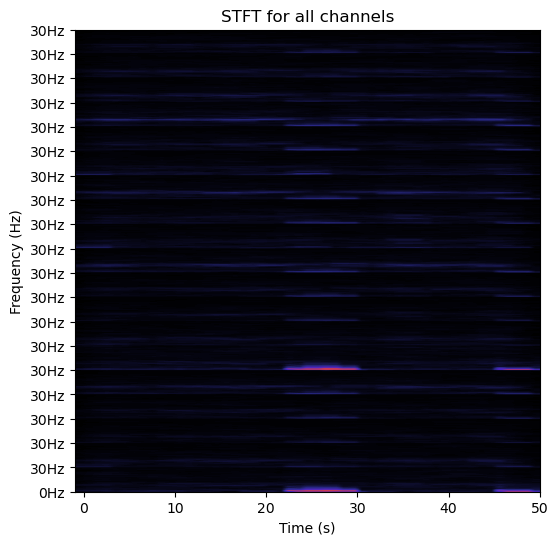

In [28]:
# 1) STFT Object 생성
window_length = int(fs) * 4 # 4초 구간의 Window
w = np.ones(window_length)
hop_length = int(fs) # 1초 구간의 Hop

STFT = signal.ShortTimeFFT(w, hop=hop_length, fs=fs, mfft=4*w.shape[0])

# 2) Channel Selection (여기서는 EKG, EOG를 drop, 추후에 EEG 데이터 순서도 생각하고 있어야 함.)
channels_to_drop = ['EKG', 'EOGLt-AVG', 'EOGRt-AVG']
try:
    sample.drop_channels(channels_to_drop)
except:
    print('Already Dropped')

# 3) 각 channel STFT result array List로 만들기

def limit_max_freq(stft_res, max_freq):
    '''
    실제 STFT 결과 Array shape의 y축은 Frequency Range와 다르다.
    이를 해결하기 위해 plt.imshow()에서 extent arg로 STFT.extent()를 넘겨서 plot 표현을 하고, 
    ylim을 통해 원하는 freq 대역을 볼 수 있었다.
    원하는 의도의 plot을 하기 위해서는 실제 STFT 결과에 원한 freq 범위를 가지도록 해야 한다.
    즉, 이 함수는 STFT 결과에 대해 max_freq를 arg로 받아서 실제 STFT 결과에 해당 범위를 가지도록 한다.
    stft_res: STFT 실행 후 결과
    max_freq: 표현하고자 하는 Max Frequency
    '''
    plot_extent_y_max = STFT.extent(sample_length)[-1]
    real_extent_y_max = stft_res.shape[0]
    real_max_freq = int(max_freq / plot_extent_y_max * real_extent_y_max)
    return stft_res[:real_max_freq, :]
    
data, times = sample[:, :] # mne로 로드한 EDF 파일
max_freq = 30
stft_arr = np.array([limit_max_freq(abs(STFT.stft(data[i])), max_freq) for i in range(data.shape[0])])
stft_all = np.concatenate(stft_arr, axis=0)

# 4) ALL CHANNEL STFT PLOT VISUALIZAITON
stft_extent = STFT.extent(sample_length)
stft_extent_plot = (stft_extent[0],
                    stft_extent[1],
                    stft_extent[2],
                    max_freq*data.shape[0])
plt.figure(figsize=(6,6))
plt.imshow(stft_all,
           origin='lower',
           aspect='auto',
           cmap='CMRmap',
           extent=stft_extent_plot)

ylabels = ['0Hz']
ylabels.extend([f'{max_freq}Hz' for i in range(data.shape[0])])
ylabels = tuple(ylabels)
plt.yticks([i * max_freq for i in range(data.shape[0]+1)], 
           ylabels)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT for all channels')

plt.savefig('./Plot Samples/each_channel_stft.jpg', dpi=500)
plt.show()